# Nopparat Pengsuk 6288103 sec2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [2]:
a = 18
b = 24
c = 30
p = (a+b+c)/2
N = (p*(p-a)*(p-b)*(p-c))
print(N)

46656.0


In [3]:
prev_x = 1
x = 1
ea = 100
es = 0.0005
while ea > es:
    x = (1/2)*(prev_x + N/prev_x)
    ea = abs((x-prev_x)/x)*100
    prev_x = x
# end for
print('Square root of {} : {}' .format(N, x))

Square root of 46656.0 : 216.0


## Question 2

In [4]:
def iee_to_dec(S,E,F):
    Sign = int(S)
    Exponent = E
    Fraction = F
    # Convert exponent to decimal
    c = len(Exponent)-1
    dec_exponent = 0
    for i in Exponent:
        dec_exponent += int(i) * (2**c)
        c -= 1
    dec_exponent = dec_exponent - 127
    # End converter
    # Convert fraction to decimal
    c = -1
    dec_fraction = 0
    for i in Fraction:
        dec_fraction += int(i) * (2**c)
        c -= 1
    # End converter
    # Convert ieee to floating in 3 decimal points
    answer = ((-1)**Sign)*(1+dec_fraction)*(2**dec_exponent)
    print('{}-{}-{} :'.format(Sign, Exponent, Fraction), round(answer, 3))

In [5]:
iee_to_dec('1','01111100','10111000000000000000000')

1-01111100-10111000000000000000000 : -0.215


## Question 3
$$
\arctan(x) = \sum_{n=1}^{\infty} (-1)^{n+1}\frac{x^{2n-1}}{2n-1}
$$
$
\arctan(\pi) = 6\times \sum_{n=1}^{\infty} (-1)^{n+1}\frac{x^{2n-1}}{2n-1}
$

In [6]:
es = 0.5*pow(10, 2-6)
ea = 100
n = 1
prev = 0
#tan(pi/6) = sqrt(3)/3 = 0.57735
x = 0.57735
n = 1
s = 0
while ea > es :
    p = (2*n)-1
    y = ((x**p)/p)*((-1)**(n+1))
    s+= y
    ea = abs((s-prev)/s)*100
    prev = s
    n+=1
print('Pi = ',s*6)

Pi =  3.1415912429364687


## Question 4

In [7]:
def f(x):
    return (-0.5*x) + np.log(x) + 1 + np.log(2)

In [8]:
def df(x):
    return 1/x - 0.5

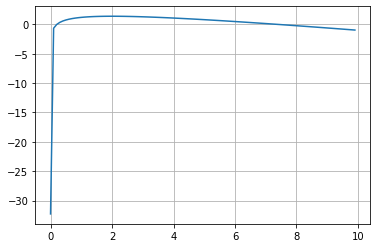

In [9]:
x = np.arange(-2, 10,0.1)
#print(x)
y = f(x)
# Plot the data
plt.plot(x, y)
plt.grid()
# Show the plot
plt.show()

### it's very close to zero until zero

In [10]:
def interval_search(l, u, n):
    xr = 1
    es = 0.5*pow(10, 2-5)
    prev_xr = 0
    ea = 100
    while ea > es:
        x = np.linspace(l, u, n)
        for i in range(n-1):
            xl = x[i]
            xu = x[i+1]
            if f(xl) * f(xu) < 0:
                xr = (xl+xu)/2
                # print('found root in ({},{}) = {}'.format(xl, xu, xr))
                l = xl
                u = xu
                break
        ea = abs((xr-prev_xr)/xr) * 100
        prev_xr = xr
        # print('approxmate error =',ea)
    print('found root in [{},{}] xr = {}'.format(xl, xu, xr))
    print('approxmate error =',ea)

In [11]:
interval_search(0.00001,1,10)

found root in [0.20302580246913582,0.20439753086419754] xr = 0.20371166666666668
approxmate error = 0.0


In [12]:
interval_search(7,8,10)

found root in [7.382716049382716,7.395061728395062] xr = 7.388888888888889
approxmate error = 0.0


In [13]:
def false_position(l, u):
    xl = l
    xu = u
    xr = 0
    es = 0.5*pow(10, 2-5)
    prev_xr = 0
    ea = 100
    while ea > es:
        # another fomula
        # xr = xl -(xu-xl) * f(xl)/(f(xu) - f(xl))
        xr = xu - f(xu) * ( (xu - xl) / ( f(xu) - f(xl) ) )
        if f(xl)*f(xr) < 0:
            xu = xr
        else:
            xl = xr
        # print('found root in ({},{}) = {}'.format(xl, xu, xr))
        ea = abs((xr-prev_xr)/xr) * 100
        prev_xr = xr
        # print('approxmate error =',ea)
    print('found root in [{},{}] xr = {}'.format(xl, xu, xr))
    print('approxmate error =',ea)

In [14]:
false_position(0.00001,1)

found root in [1e-05,0.2036665308607402] xr = 0.2036665308607402
approxmate error = 0.0004779126047155831


In [15]:
false_position(7,8)

found root in [7.385269040262629,8] xr = 7.385269040262629
approxmate error = 1.6191205016534793e-05


In [16]:
def newton(f,df,x0,p):
    es = 0.5 *(10**(2-p))
    x = prev_x = x0
    i = 0
    ea = 100
    while ea > es:
        x = x - (f(x)/df(x))
        ea = abs((x-prev_x)/x) * 100
        prev_x = x
        i += 1
    print('found root x = {}'.format(x))
    print('approxmate error =',ea)

In [17]:
newton(f,df,0.1,5)

found root x = 0.2036568621882839
approxmate error = 1.2540155865340604e-06


In [18]:
newton(f,df,7,5)

found root x = 7.385269057779396
approxmate error = 5.693871233943472e-06


In [19]:
def max_interval(f,a,b,p):
    ep = (b-a)/10
    ea = 100
    es = 0.5 * 10**(2-p)
    px = b
    while ea > es:
        l = (a+b)/2 - ep/2
        u = (a+b)/2 + ep/2
        if f(l) > f(u):
            b = u
        else:
            a = l
        xmax = (a+b)/2
        ea = abs((xmax - px)/xmax) * 100
        px = xmax
    print('({},{}) xmax = {} ea = {}'.format(a,b,xmax,ea))

In [20]:
max_interval(f,0.53,3,5)

(1.879026817321778,2.1260437774658207) xmax = 2.0025352973937993 ea = 0.00042346679394433963


In [21]:
def max_parabolic(f,x1,x2,x3,p):
    ea = 100
    es = 0.5 * 10**(2-p)
    px = x3
    
    while ea > es:
        
        alpha1 = (x2-x1)*(x2-x1)*(f(x2)-f(x3));
        alpha2 = (x2-x3)*(x2-x3)*(f(x2)-f(x1));
        beta1 = (x2-x1)*(f(x2)-f(x3));
        beta2 = (x2-x3)*(f(x2)-f(x1));
        
        gamma = (alpha1 - alpha2)/(beta1 - beta2);
        x4 = x2 - (0.5 * gamma);
        if x4 > x2:
            x1 = x2
            x2 = x4
        else:
            x3 = x2
            x2 = x4
        xopt = x4
        ea = abs((xopt - px)/xopt) * 100
        px = xopt
        # print(x1,x2,x3,x4)
        print('({},{}) xmax = {} ea = {}'.format(x1,x2,xopt,ea))

In [22]:
max_parabolic(f,0.5,1,3,5)

(1,2.073636258171289) xmax = 2.073636258171289 ea = 44.6733962226171
(2.073636258171289,2.175704914979402) xmax = 2.175704914979402 ea = 4.69129136517484
(2.073636258171289,1.9574476641526293) xmax = 1.9574476641526293 ea = 11.150093809596461
(1.9574476641526293,1.9996491140781139) xmax = 1.9996491140781139 ea = 2.1104427586006986
(1.9996491140781139,2.0012472531702334) xmax = 2.0012472531702334 ea = 0.07985715356200639
(1.9996491140781139,1.999974012464423) xmax = 1.999974012464423 ea = 0.06366286251097594
(1.999974012464423,2.0000000768174773) xmax = 2.0000000768174773 ea = 0.001303217602660072
(1.999974012464423,2.0000000054079266) xmax = 2.0000000054079266 ea = 3.57047752619805e-06


## Question 5

In [23]:
def dot_product(A,B): 
    (nrow_A,ncol_A) = A.shape 
    (nrow_B,ncol_B) = B.shape 
    if (ncol_B == nrow_A):
        C = np.zeros((nrow_A,ncol_B)) 
        (nrow_C,ncol_C) = C.shape
        for i in range(0,nrow_C):
            for j in range(0,ncol_C): 
                product_sum = 0
                for k in range(0, ncol_B): 
                    product_sum += A[i,k] * B[k,j]
                C[i,j] = product_sum 
            # end for j
        # end for l
    else:
        print('Error')
        return
    # end if (ncol_A == nrow_B) 
    return C
# end function

In [24]:
a = np.array([
        [3, -2, 4],
        [-2, 6, 2],
        [4, 2, 3],
        ])
e = np.array([
        [3,4,2],
        [13,26,75],
        [9,5,3]
        ])

In [25]:
np.dot(a,e)

array([[  19,  -20, -132],
       [  90,  158,  452],
       [  65,   83,  167]])

In [26]:
print(dot_product(a, e))

[[  19.  -20. -132.]
 [  90.  158.  452.]
 [  65.   83.  167.]]


## Question6

In [27]:
#from question
A =np.matrix([
    [-1, 2, 5, 1],
    [-3, 3, -1,4],
    [4, 1, 2, -3],
    [5, 4, 3, -1]
],dtype=float)
B = np.matrix([
    [-4],[20],[-16],[-10]
],dtype=float)

In [28]:
#After pivot
M =np.matrix([
    [5, 4, 3, -1],
    [4, 1, 2, -3],
    [-1, 2, 5, 1],
    [-3, 3, -1,4]
],dtype=float)
N = np.matrix([
    [-10],[-16],[-4],[20]
],dtype=float)

In [29]:
def fwd_elim(Ab):
    Ab_re = Ab.copy()
    [nr,nc] = Ab_re.shape
    
    # set i as the Iteration index
    for i in range(1,nr):
        print('Iteration #{}: '.format(i))
        # set r as the row index to work on
        for r in range(i,nr):
            print('  working on row index {}'.format(r))
            # iteration index represent the order of the variable that we want to eliminate
            row_factor = Ab_re[r,i-1]/Ab_re[i-1,i-1]
            Ab_re[r,:] = Ab_re[r,:] - Ab_re[i-1,:]*row_factor
        #end for r
    #end for i
    print(Ab_re)
    return Ab_re

def backsub(Ab_re):
    [nr,nc] = Ab_re.shape
    x = np.empty(nr)
    
    x[nr-1] = Ab_re[nr-1,nc-1]/Ab_re[nr-1,nr-1]
    print('x[{}] = {}'.format(nr-1,x[nr-1]))
    
    for r in range(nr-2,-1,-1):
        # range (1,-1,-1) will give i = 1,0
        # sum_of_products = sum of products of coeff of x[i+1] and x[i+1]
        # before this
        sum_of_products = 0
        for c in range(r+1, nr):
            product = Ab_re[r,c]*x[c]
            sum_of_products = sum_of_products + product
        #end for
        # -,- = + 
        # -,+ = -
        x[r] = (Ab_re[r,nc-1] - sum_of_products)/Ab_re[r,r]
    #end for
    return x
#end function

In [30]:
#Before pivot
AB = np.append(A,B,axis=1)

In [31]:
AB

matrix([[ -1.,   2.,   5.,   1.,  -4.],
        [ -3.,   3.,  -1.,   4.,  20.],
        [  4.,   1.,   2.,  -3., -16.],
        [  5.,   4.,   3.,  -1., -10.]])

In [32]:
AB_re = fwd_elim(AB)

Iteration #1: 
  working on row index 1
  working on row index 2
  working on row index 3
Iteration #2: 
  working on row index 2
  working on row index 3
Iteration #3: 
  working on row index 3
[[ -1.           2.           5.           1.          -4.        ]
 [  0.          -3.         -16.           1.          32.        ]
 [  0.           0.         -26.           4.          64.        ]
 [  0.           0.           0.           1.48717949   4.46153846]]


In [33]:
backsub(AB_re)

x[3] = 2.9999999999999942


array([-1.,  1., -2.,  3.])

In [34]:
#Pivoting
MN = np.append(M,N,axis=1)

In [35]:
MN


matrix([[  5.,   4.,   3.,  -1., -10.],
        [  4.,   1.,   2.,  -3., -16.],
        [ -1.,   2.,   5.,   1.,  -4.],
        [ -3.,   3.,  -1.,   4.,  20.]])

In [36]:
MN_re = fwd_elim(MN)

Iteration #1: 
  working on row index 1
  working on row index 2
  working on row index 3
Iteration #2: 
  working on row index 2
  working on row index 3
Iteration #3: 
  working on row index 3
[[  5.           4.           3.          -1.         -10.        ]
 [  0.          -2.2         -0.4         -2.2         -8.        ]
 [  0.           0.           5.09090909  -2.         -16.18181818]
 [  0.           0.           0.          -2.07142857  -6.21428571]]


In [37]:
backsub(MN_re)

x[3] = 3.000000000000001


array([-1.,  1., -2.,  3.])

## Question7

In [38]:
def f(x):
    return 35*x - (200+10*x+0.15*x**2)

In [39]:
def c(x):
    return 200+10*x+0.15*(x**2)

In [40]:
def r(x):
    return 35*x

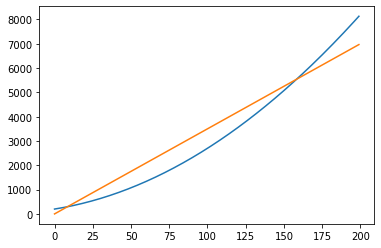

In [56]:
x = np.arange(0,200,1)
y1 = c(x)
plt.plot(x,y1)
y2 = r(x)
plt.plot(x,y2)
plt.show()

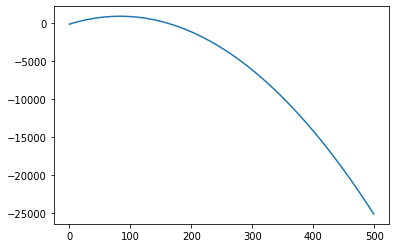

In [42]:
x = np.arange(0,500,1)
y = f(x)
plt.plot(x,y)
plt.show()

In [43]:
def bisection(l, u):
    xl = l
    xu = u
    xr = 0
    es = 0.5*pow(10, 2-4)
    prev_xr = 0
    ea = 100
    while ea > es:
        mid = (xl+xu)/2
        if f(xl)*f(mid) < 0:
            xu = mid
        else:
            xl = mid
        xr = (xl+xu)/2
        # print('found root in ({},{}) = {}'.format(xl, xu, xr))
           
        ea = abs((xr-prev_xr)/xr) * 100
        prev_xr = xr
        # print('approxmate error =',ea)
    print('found root in [{},{}] xr = {}'.format(xl, xu, xr))
    print('approxmate error =',ea)
    return xr

In [58]:
bisection(150, 160)

found root in [158.232421875,158.2421875] xr = 158.2373046875
approxmate error = 0.0030857530780386954


158.2373046875

### x at the breakeven point = 158.2373046875

In [45]:
def max_goldensearch(f,xL,xU,p):
    phi = (1+np.sqrt(5))/2 
    ea = 100
    es = 0.5 * 10**(2-p)
    while ea > es:
        d = (phi - 1)*(xU-xL)
        x1 = xL+d
        x2 = xU-d
        if f(x1) < f(x2):
            xmax = x2
            xU = x1
        else:
            xmax = x1
            xL = x2
        ea = (2-phi)*abs((xU-xL)/xmax)*100
    print('({},{}) xmax = {} ea = {}'.format(xL,xU,xmax,ea))

In [46]:
max_goldensearch(f,80,85,5)

(83.33268833851263,83.33355368987118) xmax = 83.33322315506443 ea = 0.00039664229252519


### maximum profit = 83.33322315506443

## Question8

In [47]:
house_values = 3000000
down_payment = 0
n_year = 20 ## 4-20

#interest first 3 years
rate= 1.5
interest = (rate/100)*house_values
print(interest) # per year?
x = (house_values/240) * 36
print(x) #in 3 years
house_values  = house_values - x # new house price


#interest after 3 years
interest = (rate/100)*house_values
print(interest) # per year?
x = (house_values/240) * 36
print(x) #in 17 years
house_values  = house_values - x
print(house_values)


45000.0
450000.0
38250.0
382500.0
2167500.0


In [48]:
3000000*0.015


45000.0

In [49]:
3000000/240

12500.0

In [50]:
12500*36


450000